In [19]:
using Revise
using CMF
using PyPlot; plt = PyPlot
using PyCall

sep = CMF.Separable

include("./sep_plot_settings.jl")

set_size

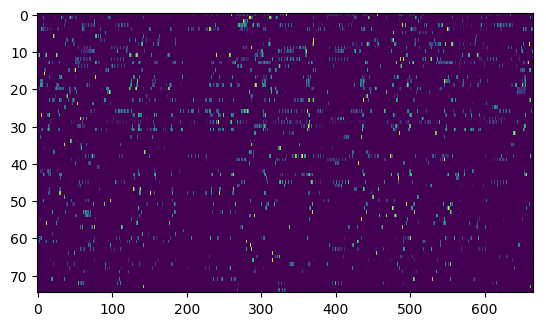

In [2]:
scipy_io = pyimport("scipy.io")
f = scipy_io.loadmat("../../cmf_data/MackeviciusData.mat")
data = f["NEURAL"]

plt.imshow(data, aspect=5)
plt.show()

In [3]:
function plot_reconstruction(
        r,
        sort_units=true,
    )

    idx = sort_units ? CMF.sortperm(r) : 1:CMF.num_units(r)

    # Form model estimate
    est = CMF.tensor_conv(r.W, r.H)

    fig, ax = plt.subplots(2, 1)
    ax[1].imshow(r.data[idx, :], aspect=3)
    ax[2].imshow(est[idx, :], aspect=3)

    return fig, ax
end

function plot_Ws(
    r;
    sort_units=true,
    trueW=nothing
)

    data, W, H = r.data, r.W, r.H
    idx = sort_units ? CMF.sortperm(r) : 1:CMF.num_units(r)

    fig, ax = plt.subplots(1, CMF.num_components(r))
    for (k, a) in enumerate(ax)
        a.imshow(transpose(W[:, idx, k]), aspect="auto")
    end

    if ~isnothing(trueW)
        fig2, ax2 = plt.subplots(1, CMF.num_components(r))
        for (k, a) in enumerate(ax2)
            a.imshow(transpose(trueW[:, idx, k]), aspect="auto")
            a.set_yticks([])
        end
    end

    return fig, ax
end

plot_Ws (generic function with 1 method)

In [4]:
K, L = 3, 25

(3, 25)

## Fit with HALS

In [9]:
res = CMF.fit_cnmf(
    data, K=K, L=L, alg=:hals, 
    max_iter=Inf, max_time=10
);

print(res.loss_hist[end])

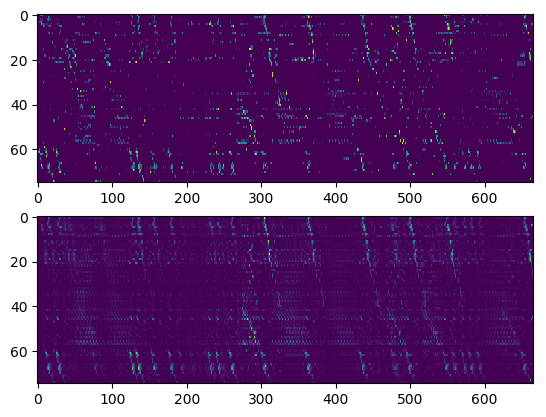

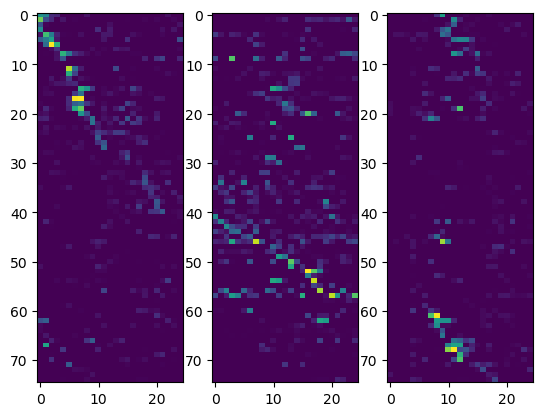

(Figure(PyObject <Figure size 640x480 with 3 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8eaf61940>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8eaf89e48>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8eaf39400>])

In [10]:
plot_reconstruction(res)
plot_Ws(res)

## Fit with LECS

In [69]:
thresh = 0.25
refit_H_itr = 0

sep_res = CMF.fit_cnmf(
    data, K=K, L=L, alg=:sep,
    thresh=thresh, refit_H_itr=refit_H_itr, verbose=false
);

print(sep_res.loss_hist[end])

1.6232484346312575

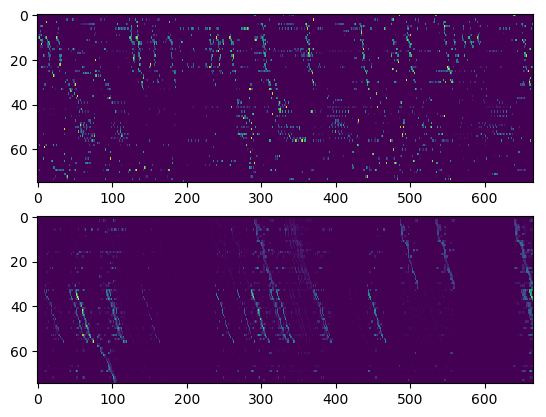

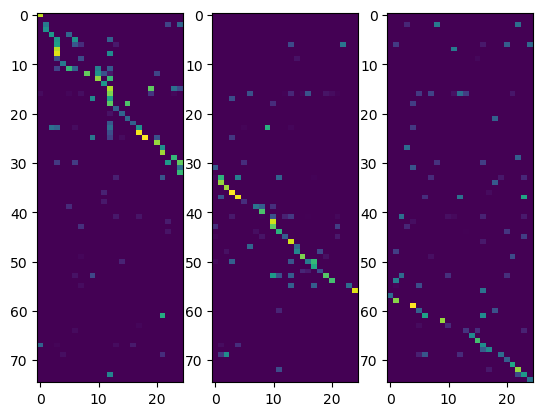

(Figure(PyObject <Figure size 640x480 with 3 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8df520fd0>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8df4d2518>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8df4faa90>])

In [70]:
plot_reconstruction(sep_res)
plot_Ws(sep_res)

## Use separable fit as initialization

In [27]:
super_res = CMF.fit_cnmf(
    data, K=3, L=25, alg=:hals, 
    max_iter=Inf, max_time=10,
    initW=sep_res.W, initH=sep_res.H
);

print(super_res.loss_hist[end])

0.7432272804666149

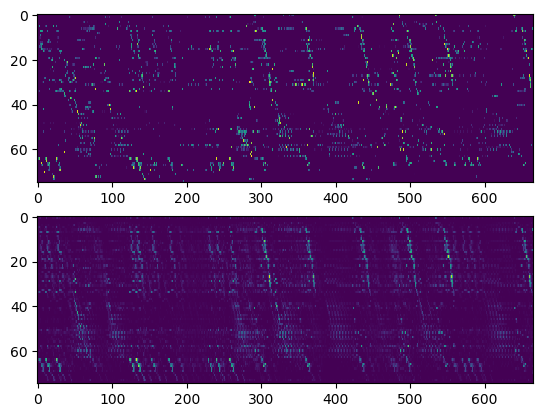

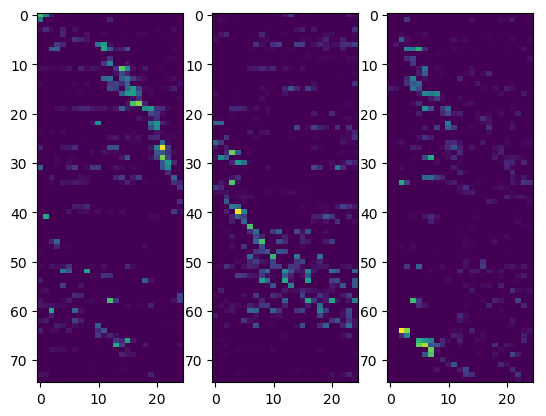

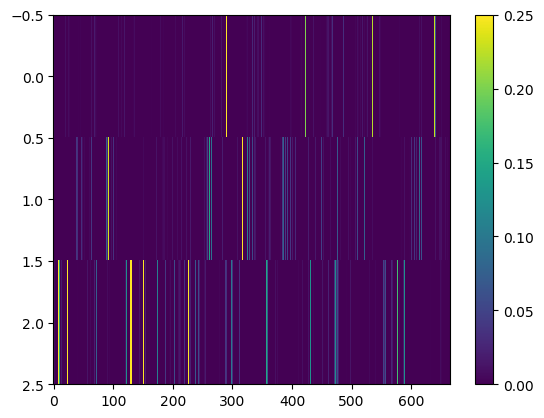

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc8e8372d68>

In [38]:
plot_reconstruction(super_res)
plot_Ws(super_res)

plt.figure()
plt.imshow(super_res.H, aspect="auto", clim=(0, 0.25))
plt.colorbar()